Q1

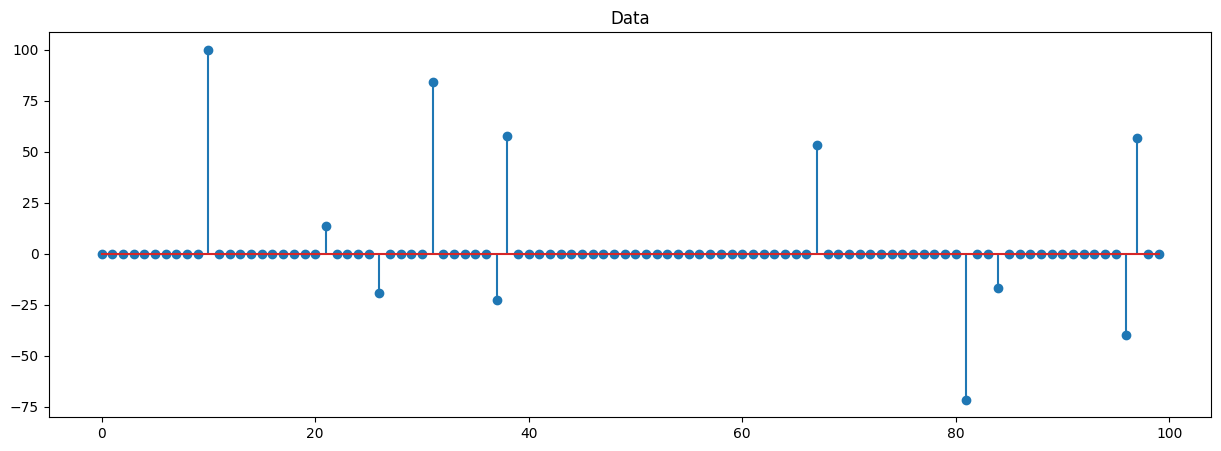

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200449 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)

plt.show()



min of data -71.63555849089394 max of data 100.0
mean of data 1.9453101039307368 std of data 18.497475662249357


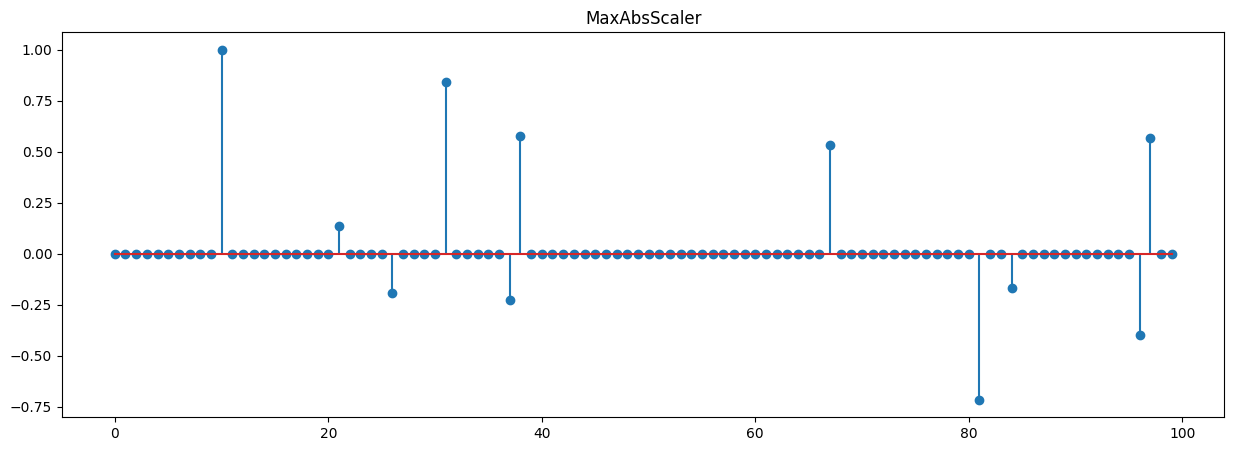

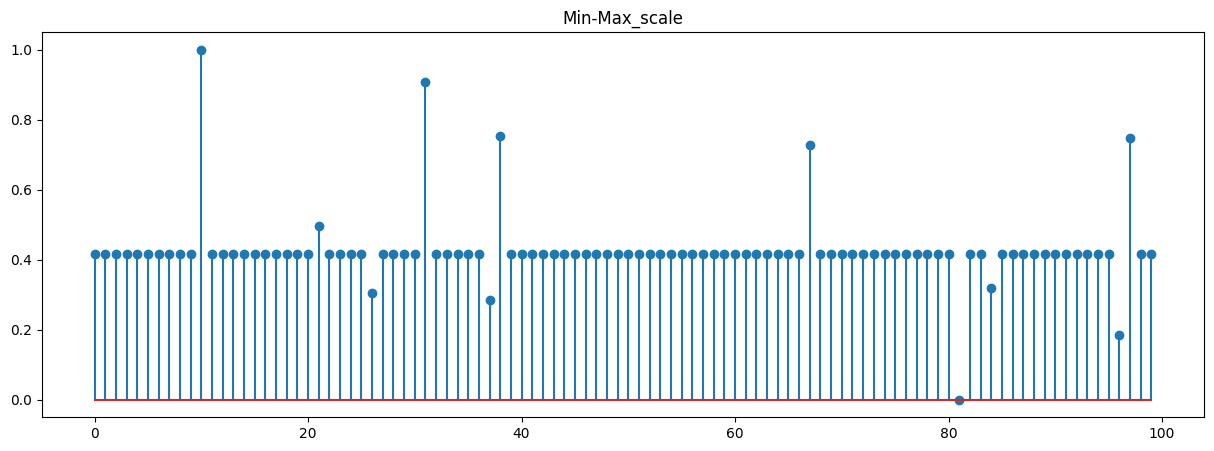

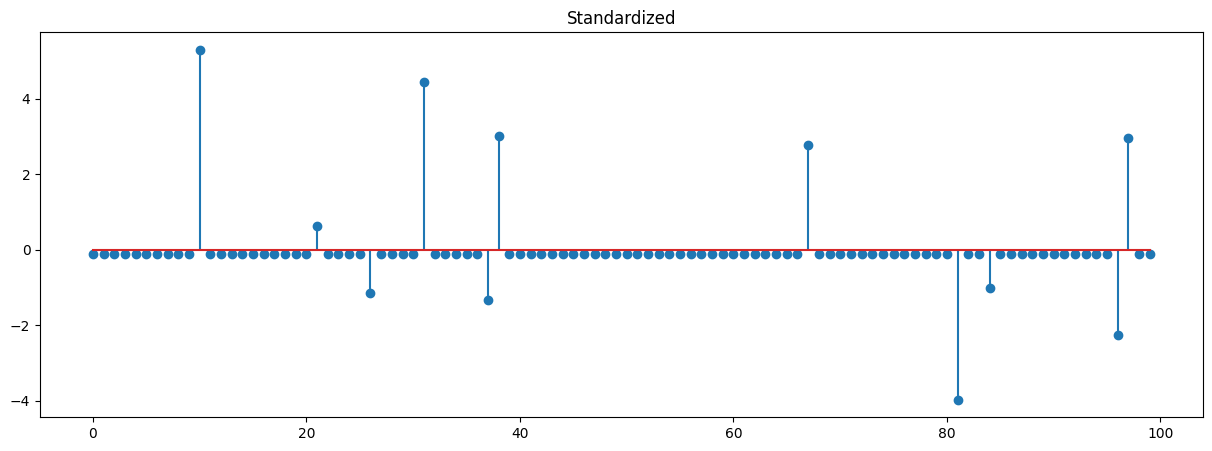

In [11]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaled_data = MaxAbsScaler().fit_transform(signal)



def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)

def standardize(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    standardized_data = (data - mean) / std
    return standardized_data

standardized_data = standardize(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("MaxAbsScaler")
plt.stem(max_abs_scaled_data)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Min-Max_scale")
plt.stem(scaled_data_min_max)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Standardized")
plt.stem(standardized_data)
plt.show()


In [10]:
print("Number of non zeros in the 4 plots")
print("Signal", np.count_nonzero(signal))
print("MaxAbs Scaler", np.count_nonzero(max_abs_scaled_data))
print("Min-Max Data", np.count_nonzero(scaled_data_min_max))
print("Standardized Data", np.count_nonzero(standardized_data))




Number of non zeros in the 4 plots
Signal 11
MaxAbs Scaler 11
Min-Max Data 99
Standardized Data 100


Q2

1.

In [58]:
import numpy as np
import pandas as pd

file_path = r'Advertising.csv'

df = pd.read_csv(file_path)

print(df.head())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


2.

In [59]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

3.

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#Train a linear regression model and estimate the coefficient corresponds to independent variables (advertising budgets for TV, radio and newspapers).

coefficient = model.coef_
intercept = model.intercept_
print("Coefficients", coefficient)
print("Intercept", intercept)




Coefficients [0.0468431  0.17854434 0.00258619]
Intercept 2.907947020816433


4.

In [62]:
from sklearn.metrics import mean_squared_error
from scipy import stats

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


rss_train = np.sum((y_train - y_pred_train)**2)
rss_test = np.sum((y_test - y_pred_test)**2)

d = 4          # 3 features + 1 intercept
N = len(X_train)

rse_train = np.sqrt(rss_train/(N-d))

N = len(X_test)
rse_test = np.sqrt(rss_test/(N-d))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print("RSS Train", rss_train)
print("RSE Train", rse_train)
print("MSE Train", mse_train)
print("R^2 Train", r_squared_train)

print('')

print("RSS Test", rss_test)
print("RSE Test", rse_test)
print("MSE Test", mse_test)
print("R^2 Test", r_squared_test)

RSS Train 482.6928972255484
RSE Train 1.7590296298315473
MSE Train 3.0168306076596774
R^2 Train 0.8959372632325174

RSS Test 79.67542207315164
RSE Test 1.4876848351376901
MSE Test 1.991885551828791
R^2 Test 0.8927605914615384


In [63]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     447.7
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           2.12e-76
Time:                        01:21:27   Log-Likelihood:                -315.37
No. Observations:                 160   AIC:                             638.7
Df Residuals:                     156   BIC:                             651.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9079      0.349      8.339      0.0

In [69]:
std_errors = model.bse
print('Std errors','\n')
print(std_errors)
print('')

t_values = model.tvalues
print('t values','\n')
print(t_values)
print('')

p_values = model.pvalues
print('p values','\n')
print(p_values)


Std errors 

const        0.348709
TV           0.001598
radio        0.010058
newspaper    0.007270
dtype: float64

t values 

const         8.339168
TV           29.311853
radio        17.750644
newspaper     0.355736
dtype: float64

p values 

const        3.683233e-14
TV           2.475233e-65
radio        2.835411e-39
newspaper    7.225188e-01
dtype: float64


Q3

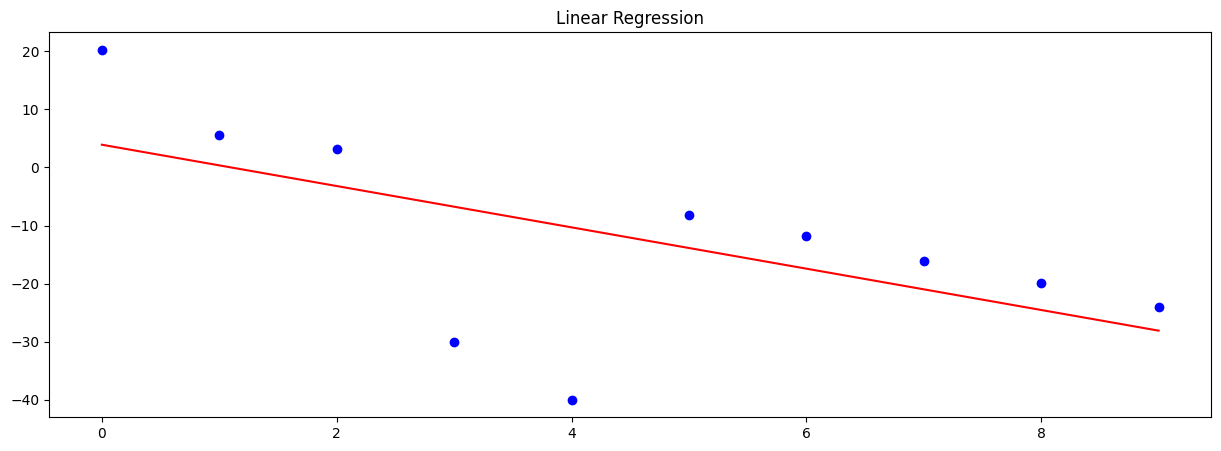

In [88]:
xi = np.array([0,1,2,3,4,5,6,7,8,9])
yi = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

model = LinearRegression()
model.fit(xi.reshape(-1,1), yi)

predicted_y = model.predict(xi.reshape(-1,1))

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Linear Regression")
plt.scatter(xi, yi, color='blue')
plt.plot(xi, predicted_y, color='red')
plt.show()


In [89]:
coefficient = model.coef_
intercept = model.intercept_

print("Coefficients", coefficient)
print("Intercept", intercept)

Coefficients [-3.55727273]
Intercept 3.916727272727277


In [91]:
def loss_function(y,y_prediction,beta=1):
    N = len(y)
    residuals_square = (y-y_prediction)**2
    denominator = residuals_square + beta**2
    loss = (1/N) * np.sum(residuals_square/denominator)

    return loss

def model1(x):
    return -4*x + 12

def model2(x):
    return -3.55*x + 3.91

y_pred_1 = model1(xi)
y_pred_2 = model2(xi)

loss_1 = loss_function(yi, y_pred_1)
loss_2 = loss_function(yi, y_pred_2)

print("Loss of model 1 - ", loss_1)
print("Loss of model 2 - ", loss_2)






Loss of model 1 -  0.435416262490386
Loss of model 2 -  0.9728470518681676


In [101]:
print(yi)
print(y_pred_1)
print(y_pred_2)

[ 20.26   5.61   3.14 -30.   -40.    -8.13 -11.73 -16.08 -19.95 -24.03]
[ 12   8   4   0  -4  -8 -12 -16 -20 -24]
[  3.91   0.36  -3.19  -6.74 -10.29 -13.84 -17.39 -20.94 -24.49 -28.04]


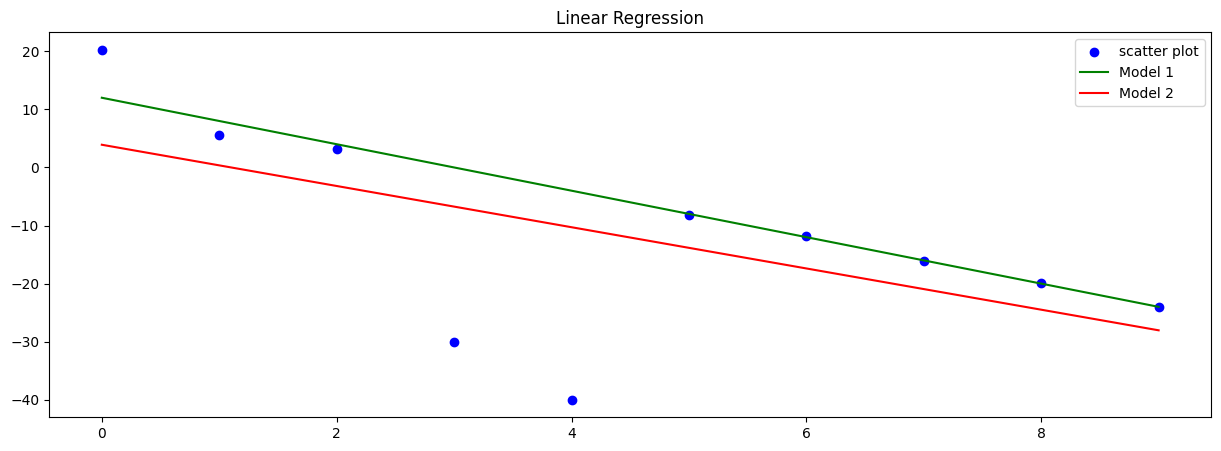

In [105]:
#plot scatter plots and the 2 models

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Linear Regression")
plt.scatter(xi, yi, color='blue')
plt.plot(xi, y_pred_1, color='green')
plt.plot(xi, y_pred_2, color='red')

plt.legend(['scatter plot','Model 1', 'Model 2'], loc='upper right')

plt.show()
